# Simple Linear Regression

In [14]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols


In [15]:
df = pd.read_csv("train.csv")

In [16]:
features = ["LotArea","LotFrontage","TotalBsmtSF","GrLivArea","SalePrice"]
mydf = df[features]
mydf.dropna()
mydf.reset_index(inplace=True, drop=True)

C:\Users\Mahyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


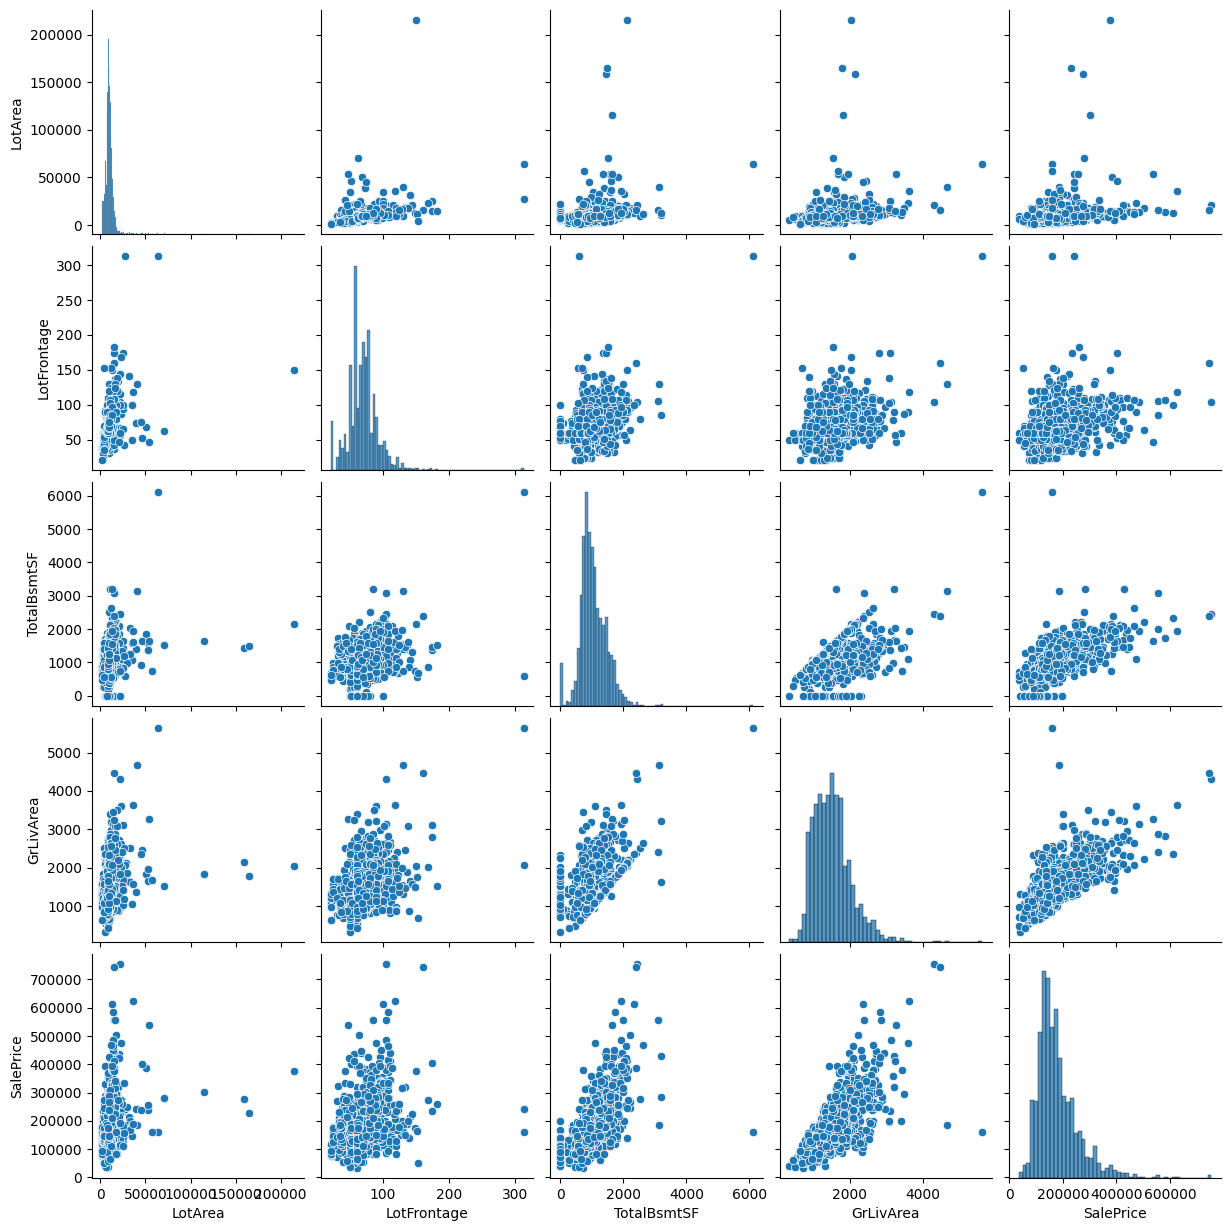

In [17]:
sns.pairplot(mydf)

The pairplot for each variables are displayed

GrLivAre and SalePrice pairplot almost looks like a linear relationship between these two variables 

So let's do a linear regression 

## check the assumption of Linear Regression

Normality:

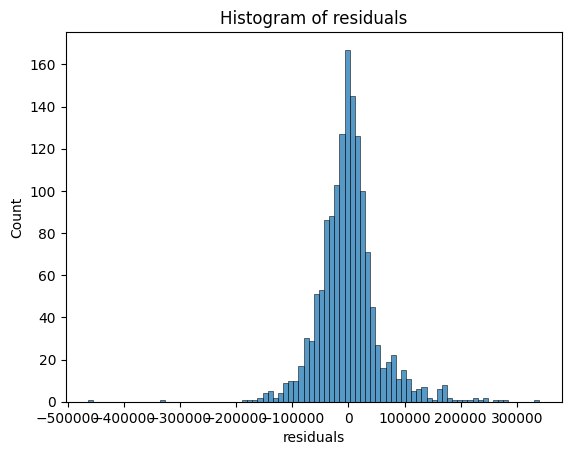

In [21]:
fig = sns.histplot(residuals)
fig.set_xlabel("residuals")
fig.set_title("Histogram of residuals")
plt.show()

as the distribution of residuals looks like normal, let's see on qqplot diagram

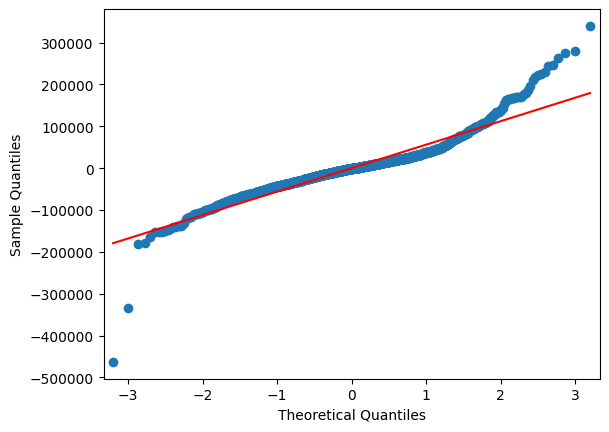

In [23]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

the plots are almost in a linear line. so the assumption of normality is accepted

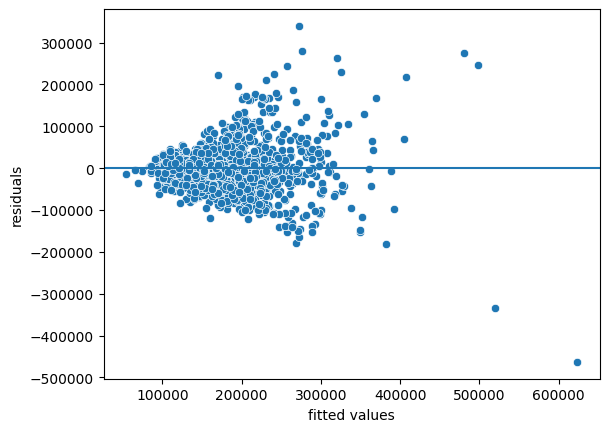

In [22]:
import matplotlib.pyplot as plt
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("fitted values")
fig.set_ylabel("residuals")
plt.show()

in above diagram, the plots are randomly distributed; so the Homoscedasticity assumption is accepted

## Linear Regression Model

In [18]:
ols_mydf = mydf[["GrLivArea","SalePrice"]]

ols_formula = "SalePrice ~ GrLivArea"

In [19]:
OLS = ols(formula = ols_formula, data = ols_mydf)
model = OLS.fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.52e-223
Time:                        18:44:09   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared %50.2: the variation of Y variable can explained by 50.2% by X 

by P-value = 0 we can confirm that GrLivArea can effect SalePrice

### But ... the Cond No. = 4900 which is greater than 30. this result shows Multicollinearity

In [8]:
X = ols_mydf["GrLivArea"]
fitted_values = model.predict(X)

In [9]:
residuals = model.resid

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

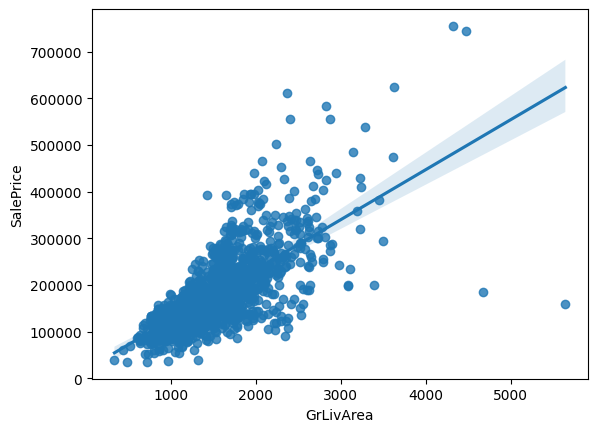

In [10]:
sns.regplot(x = "GrLivArea", y = "SalePrice", data = ols_mydf)